In [1]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

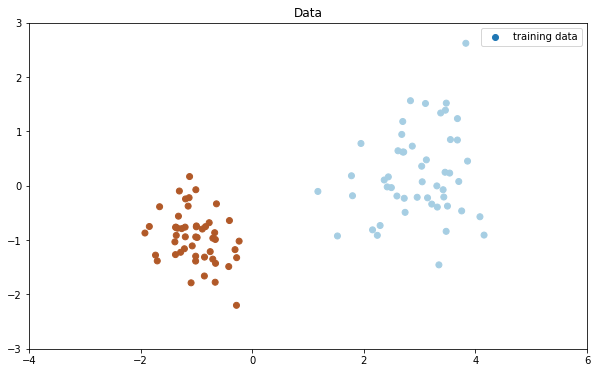

In [13]:
# Start with some dummy data points.
import numpy as np
import matplotlib.pyplot as plt

# You can define a function to create your dummy dataset.
def dummyData(add_outliers=False, add_class=False):
    x0 = np.random.randn(50, 2) * 0.7 + np.array([3.0, 0.0])
    x1 = np.random.randn(50, 2) * 0.5 + np.array([-1.0, -1.0])
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(len(x0)), np.ones(len(x1))]).astype(np.int)

# Then, try to call the function to create some data.
x_train, y_train = dummyData()

# Visualize the dummy dataset.
plt.figure(figsize=(10,6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired', label='training data')
plt.axis([-4, 6, -3, 3])
plt.title('Data')
plt.legend()

In [28]:
# You can define a function to split the dataset at hand.
def trainTestSplit(x, y):
    data = np.c_[x, y]
    np.random.shuffle(data)
    x_train = data[:int(0.7*len(data)), :2]  # 70% of data for training
    x_test = data[int(0.7*len(data)):, :2]  # 30% for testing
    y_train = data[:int(0.7*len(data)), 2:]  # 70% of data for training
    y_train = y_train.reshape(-1,)
    y_test = data[int(0.7*len(data)):, 2:]  # 30% for testing
    y_test = y_test.reshape(-1,)
    return x_train, y_train, x_test, y_test

# Apply the function to your data.
X_train, Y_train, X_test, Y_test = trainTestSplit(x_train, y_train)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(70, 2) (70,) (30, 2) (30,)


In [33]:

def train(X, y, lr, n_iters):
    n_samples, n_features = X.shape
    y_ = np.where(y <= 0, -1, 1)
    w = np.zeros(n_features)
    b = 0

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= lr * (2 * lambda_param * w)
            else:
                w -= lr * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                b -= lr * y_[idx]
    return w, b


def predict(X, w, b):
    approx = np.dot(X, w) - b
    return np.sign(approx)


In [35]:
learning_rate=0.001
lambda_param=0.01
n_iters=1000

weights, bias = train(X_train, Y_train, learning_rate, n_iters)
print(weights, bias)

[-1.08087619 -0.19788012] -0.46900000000000036


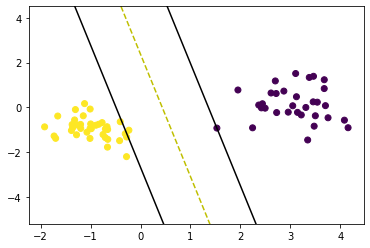

In [37]:

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o',c=Y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = get_hyperplane_value(x0_1, weights, bias, 0)
x1_2 = get_hyperplane_value(x0_2, weights, bias, 0)

x1_1_m = get_hyperplane_value(x0_1, weights, bias, -1)
x1_2_m = get_hyperplane_value(x0_2, weights, bias, -1)

x1_1_p = get_hyperplane_value(x0_1, weights, bias, 1)
x1_2_p = get_hyperplane_value(x0_2, weights, bias, 1)

ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

x1_min = np.amin(X_train[:,1])
x1_max = np.amax(X_train[:,1])
ax.set_ylim([x1_min-3,x1_max+3])

plt.show()